In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm

import matplotlib.pyplot as plt
import csv
import re

from sklearn.linear_model import LinearRegression
from scipy import stats


%matplotlib inline

## Task 1: Download your data and load them into the Python.
You can find them [**here**](https://drive.google.com/file/d/0Bz9_0VdXvv9bX0MzUEhVdmpCc3c/view?usp=sharing).

- Features and response variables are in different files
- be careful about number of spaces between the values in the file

In [3]:
results = []
with open('/Users/jurajkapasny/Drive/Data/UCI HAR Dataset/train/X_train.txt') as inputfile:
    for row in csv.reader(inputfile):
        results.append([float(i) for i in re.sub("\s+",",",row[0].strip()).split(",")])
    

In [4]:
X_train = pd.DataFrame(results)
#train_X_str = pd.DataFrame(results)

In [5]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


## Task 2: Create Binary target variable: categories 1,2,3 --> 1, categories 4,5,6 --> 0 
This will represent binary variable indicating if person is walking or not

In [8]:
results = []
with open('/Users/jurajkapasny/Drive/Data/UCI HAR Dataset/train/y_train.txt') as inputfile:
    for row in csv.reader(inputfile):
        results.append([float(i) for i in re.sub("\s+",",",row[0].strip()).split(",")])
train_y = pd.DataFrame(results)
train_y.loc[:,"walking"] = 0
train_y.loc[train_y[0].isin([1,2,3]), "walking"] = 1
train_y.columns = ["category","walking"]

In [9]:
train_y.head()

,category,walking
0,5.0,0
1,5.0,0
2,5.0,0
3,5.0,0
4,5.0,0


## Task 3

+ Create Univariate Binary Logistic Regression with feature number 54, which represents `tGravityAcc-min()-Y`: gravity acceleration signals in direction of Y
+ Compare the results of Logistic regressions from different Python packages (sklearn, statsmodel)
+ Plot the FIT of predicted probabilities to the original values

In [13]:
#y_cat = train_y["category"].values
y_bin = train_y.walking.values
X_train_mt = X_train[54].values.reshape(-1,1)

In [14]:
X_train_mt

array([[ 0.05648273],
       [ 0.10276411],
       [ 0.10276411],
       ...,
       [-0.06891924],
       [-0.0400087 ],
       [-0.04749059]])

In [15]:
lr = LogisticRegression(fit_intercept=True)
lr.fit(X_train_mt, y_bin)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
lr.coef_[0]

array([-4.08782292])

In [17]:
predictions = lr.predict_proba(X_train_mt)

In [18]:
#taking just probability of an event
prob_walking = []
for pred in predictions:
    prob_walking.append(pred[1])

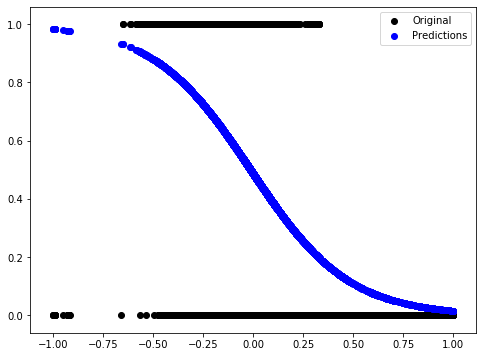

In [19]:
plt.figure(1, figsize=(8, 6))
x = plt.scatter(X_train_mt.ravel(), y_bin, color='black', zorder=20, label = "Original")
y = plt.scatter(X_train_mt.ravel(), prob_walking, color='blue', zorder=20, label = "Predictions")
plt.legend(handles=[x, y])

## Task 4
- Try to fit Binary Logistic Regression with all the features? How many are significant?

In [36]:
# p values for particular beta coeficient need to be lower than 0.05

## Task 5
Now, let's fit Multinomial Logistic regression to predict all categories. Firstly, we can start with **Univariate** model for these features number separately:
+ 4
+ 54
- 19

Check the contingency matrix to see the effect of particular features!! (each feature can be good in predicting different categories)

In [20]:
def contingency_matrix(predictions, original):
    pred = list(predictions)
    orig = list(original)
    matrix = pd.DataFrame()
    matrix["pred"] = pred
    matrix["orig"] = orig
    res = pd.DataFrame(matrix.groupby(["pred","orig"]).size(),columns=["count"])
    return res

In [23]:
y_cat = train_y["category"].values
X_train_mt = X_train.values

In [31]:
def uni_mlr_fitting(trainset_df, target, feature):
    X_train_mt = trainset_df[[feature]].values.reshape(-1,1)
    mlr = LogisticRegression(fit_intercept=True)
    mlr.fit(X_train_mt, target)
    predictions = mlr.predict(X_train_mt)
    
    return mlr,predictions

In [32]:
mlr, predictions = uni_mlr_fitting(X_train,y_cat, 19)

In [33]:
sum(predictions == y_cat)

3503

In [34]:
contingency_matrix(predictions,y_cat)

count
pred orig       
1.0  1.0    1059
     2.0     872
     3.0     308
     4.0       1
     6.0      16
3.0  1.0     152
     2.0     192
     3.0     677
     6.0       3
5.0  4.0    1137
     5.0    1230
     6.0     851
6.0  1.0      15
     2.0       9
     3.0       1
     4.0     148
     5.0     144
     6.0     537

Repeat the same proces for other two features and compare contingency matrices!!

## Task 6

Fit the Multinomial Logistic Regression model again. Now, try to choose **all** important features we have in the dataset. Who will get the best predictions with the smallest number of features?

## Task 7 (Stretch)
Create your own function for Stepwise selection. Use either sklearn or statsmodel.